In [4]:
p53_genes = [
    'TP53', 'CDKN1A', 'MDM2', 'BAX', 'GADD45A', 'FAS', 'BBC3', 'NOXA', 'PMAIP1',
    'CCND1', 'CDK2', 'CDK4', 'RB1', 'E2F1', 'ATM', 'ATR', 'CHEK1', 'CHEK2',
    'CASP3', 'CASP8', 'CASP9', 'CYCS', 'BCL2', 'BCL2L1', 'BID',
    'GADD45B', 'GADD45G', 'PCNA', 'SESN1', 'SESN2', 'SFN', 'ZMAT3',
    'RRM2B', 'DDB2', 'XPC', 'PMAIP1', 'TP73', 'TP63', 'PTEN', 'AKT1', 'PIK3CA',
    'CDKN2A', 'CCNE1', 'CDK6', 'FOXO3', 'MAPK14', 'MAPK8', 'MAPK9', 'JUN', 'FOS'
]
p53_genes = ["SIAH1","IGFBP3","GADD45G","GADD45A","GADD45B","MDM4","CHEK1","ATR","CHEK2","ATM","RPRM","SFN","CDK2","CCNE1","CCNE2","TSC2","PPM1D",
              "TP73","CCNG1","CCNG2","RRM2","DDB2","STEAP3","PTEN","SERPINB5","CD82","THBS1","IGF1","SERPINE1","ADGRB1","CDKN2A","CDKN1A","ZMAT3",
              "BID","EI24","TP53I3","FAS","GTSE1","BAX","PIDD1","TNFRSF10B","CASP8","CDK1","APAF1","CYCS","CASP9","MDM2","TP53","RCHY1","CDK4","CDK6",
              "CCND1","CCND2","CCND3","PERP","SESN1","CCNB1","CCNB2","CASP3","TP53AIP1","BBC3","PMAIP1","SIVA1","BCL2L1","BCL2","PPP1R13L",]
len(p53_genes)

66

In [ ]:
from pathlib import Path
import networkx as nx

def create_topo_file_from_graph(network_name, G: nx.DiGraph, dir):
    """
    Create a topo file as expected by racipe from a nx Graph
    and store it in the const.TOPO_PATH directory.
    :param G: nx Graph
    """
    new_file_path = Path(dir) / f"{network_name}.topo" 
    # save graph to a trrust.topo file with the header Source Target Type
    with open(new_file_path, "w") as f:
        f.write("Source Target Type\n")
        for u, v, d in G.edges(data='2'):
            print(f"Adding edge {u} -> {v} with weight {d}")
            f.write(f"{u} {v} {d}\n")

In [6]:
# load dorothea_human_full.csv
import networkx as nx
import pandas as pd
dorothea_df = pd.read_csv('dorothea_human_full.csv')


In [7]:
from pathlib import Path
def create_topo_file_from_graph(network_name, G: nx.DiGraph, dir):
    """
    Create a 
     file as expected by racipe from a nx Graph
    and store it in the const.TOPO_PATH directory.
    :param G: nx Graph
    """
    new_file_path = Path(dir) / f"{network_name}.topo" 
    # save graph to a trrust.topo file with the header Source Target Type
    with open(new_file_path, "w") as f:
        f.write("Source Target Type\n")
        for u, v, d in G.edges(data='mor'):
            d = 1 if d > 0 else 2  # Convert to 1 for activation, 2 for inhibition
            f.write(f"{u} {v} {d}\n")

In [8]:
import matplotlib.pyplot as plt

def plot_dorothea_graph(G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightgreen')
    # Determine edge colors based on 'mor' attribute
    edge_colors = []
    for u, v, d in G.edges(data=True):
        mor = d.get('mor', 1)
        edge_colors.append('red' if mor < 0 else 'green')
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color=edge_colors)
    nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
    plt.title("Dorothea Subgraph with Key TFs")
    plt.axis('off')
    plt.show()

In [9]:

def create_dorothea_graph(dorothea_df):
    G = nx.DiGraph()
    for _, row in dorothea_df.iterrows():
        G.add_edge(row['source'], row['target'], confidence=row['confidence'], mor=row['mor'])
    return G

G = create_dorothea_graph(dorothea_df)

#group df by confidence and mor. print value counts for each group
confidence_counts = dorothea_df.groupby(['confidence', 'mor']).size().reset_index(name='count')
print("Value counts of confidence and mor in the Dorothea dataset:")
print(confidence_counts)

Value counts of confidence and mor in the Dorothea dataset:
  confidence       mor   count
0          A -1.000000     717
1          A  1.000000    5363
2          B -0.500000      22
3          B  0.500000    9011
4          C -0.333333      31
5          C  0.333333   17131
6          D -0.250000    1293
7          D  0.250000  243163


In [10]:
#filter out edges with confidence not in A, B, C
def filter_edges_by_confidence(G, valid_confidences):
    filtered_graph = G.copy()
    edges_to_remove = [(u, v) for u, v, d in filtered_graph.edges(data=True) if d['confidence'] not in valid_confidences]
    filtered_graph.remove_edges_from(edges_to_remove)
    filtered_graph.remove_nodes_from(list(nx.isolates(G)))
    return filtered_graph
# Filter the subgraph to keep only edges with confidence A, B, C
print(f"Unfiltered subgraph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
valid_confidences = ['A', 'B', 'C', 'D']
G_filtered = filter_edges_by_confidence(G, valid_confidences)
# drop isolated nodes
G_filtered = G_filtered.copy()
G_filtered.remove_nodes_from(list(nx.isolates(G_filtered)))
# Print info about the filtered graph
print(f"Filtered subgraph: {G_filtered.number_of_nodes()} nodes, {G_filtered.number_of_edges()} edges")
#print amount of weakly connected components in the filtered graph
num_components = nx.number_weakly_connected_components(G_filtered)
print(f"Number of weakly connected components in filtered subgraph: {num_components}")
print(f"size of all components in filtered subgraph: {[len(c) for c in nx.weakly_connected_components(G_filtered)]}")
# choose the largest component
largest_component = max(nx.weakly_connected_components(G_filtered), key=len)
G_filtered = G_filtered.subgraph(largest_component).copy()

Unfiltered subgraph: 18577 nodes, 276731 edges
Filtered subgraph: 18577 nodes, 276731 edges
Number of weakly connected components in filtered subgraph: 1
size of all components in filtered subgraph: [18577]


In [11]:
# interesting nodes TP53, MTOR, MAPK1, MAPK3, MAPK14, MAPK8, MAPK9, JUN, FOS
interesting_nodes = ['TP53', 'MTOR', 'MAPK1', 'MAPK3', 'MAPK14', 'MAPK8', 'MAPK9', 'JUN', 'FOS']
# check if interesting nodes are in the filtered graph
for node in interesting_nodes:
    if node in G_filtered:
        print(f"{node} is in the filtered graph")
    else:
        print(f"{node} is NOT in the filtered graph")

TP53 is in the filtered graph
MTOR is in the filtered graph
MAPK1 is in the filtered graph
MAPK3 is in the filtered graph
MAPK14 is in the filtered graph
MAPK8 is in the filtered graph
MAPK9 is in the filtered graph
JUN is in the filtered graph
FOS is in the filtered graph


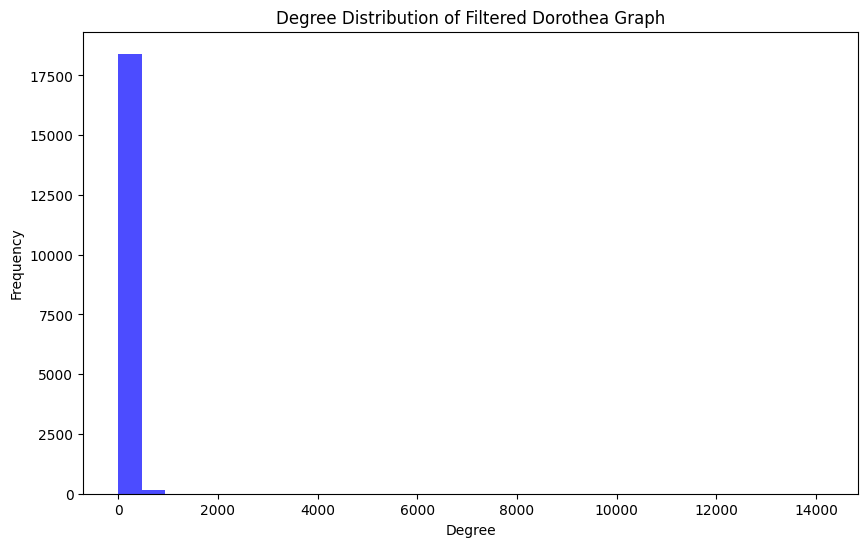

Number of nodes: 18577
Number of nodes without outgoing edges: 17934
Top 10 nodes with highest out-degree:
CTCF: 14125 out-degree
TFAP2C: 11222 out-degree
EGR1: 10673 out-degree
STAT1: 10540 out-degree
CEBPA: 9979 out-degree
FOXA1: 9964 out-degree
HNF4A: 9523 out-degree
ETS1: 9454 out-degree
FOS: 8451 out-degree
GATA3: 7216 out-degree


In [12]:
# print statistics of the graph - plot degree, print num nodes without outgoing edges
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
degree_sequence = [d for n, d in G_filtered.degree()]
plt.hist(degree_sequence, bins=30, color='blue', alpha=0.7)
plt.title("Degree Distribution of Filtered Dorothea Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
# print number of nodes without outgoing edges
num_nodes_without_outgoing_edges = sum(1 for n in G_filtered.nodes() if G_filtered.out_degree(n) == 0)
print(f"Number of nodes: {G_filtered.number_of_nodes()}")
print(f"Number of nodes without outgoing edges: {num_nodes_without_outgoing_edges}")
# print top 10 nodes with highest out-degree
top_10_out_degree_nodes = sorted(G_filtered.out_degree, key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes with highest out-degree:")
for node, degree in top_10_out_degree_nodes:
    print(f"{node}: {degree} out-degree")

In [13]:
import networkx as nx
import numpy as np

def reduce_graph_to_n_nodes(G, n, batch_size=10):
    """
    Reduce G to <= n nodes, keeping only the largest weakly connected component at each step.
    Drop nodes based on inverse out-degree probability, in batches.
    """
    # Always work on a copy
    G = G.copy()

    while True:
        # Step 1: Get largest WCC
        largest_component = max(nx.weakly_connected_components(G), key=len)
        G = G.subgraph(largest_component).copy()

        if G.number_of_nodes() <= n:
            break

        # Step 2: Compute drop probabilities
        nodes = np.array(G.nodes())
        out_degrees = np.array([G.out_degree(node) for node in nodes])
        epsilon = 1e-6
        inv_out_degrees = 1 / (np.sqrt(out_degrees) + epsilon)
        probabilities = inv_out_degrees / inv_out_degrees.sum()

        # Step 3: Drop a batch of nodes
        drop_count = min(batch_size, G.number_of_nodes() - n)
        drop_nodes = np.random.choice(nodes, size=drop_count, replace=False, p=probabilities)
        G.remove_nodes_from(drop_nodes)

    return G


# Reduce the filtered graph to 150 nodes
target_size = 100
G_reduced = reduce_graph_to_n_nodes(G_filtered, target_size)
# print number of weakly connected components in the reduced graph
num_components = nx.number_weakly_connected_components(G_reduced)
print(f"Number of weakly connected components in reduced graph: {num_components}")
print(f"Number of nodes in reduced graph: {G_reduced.number_of_nodes()}")

Number of weakly connected components in reduced graph: 1
Number of nodes in reduced graph: 100


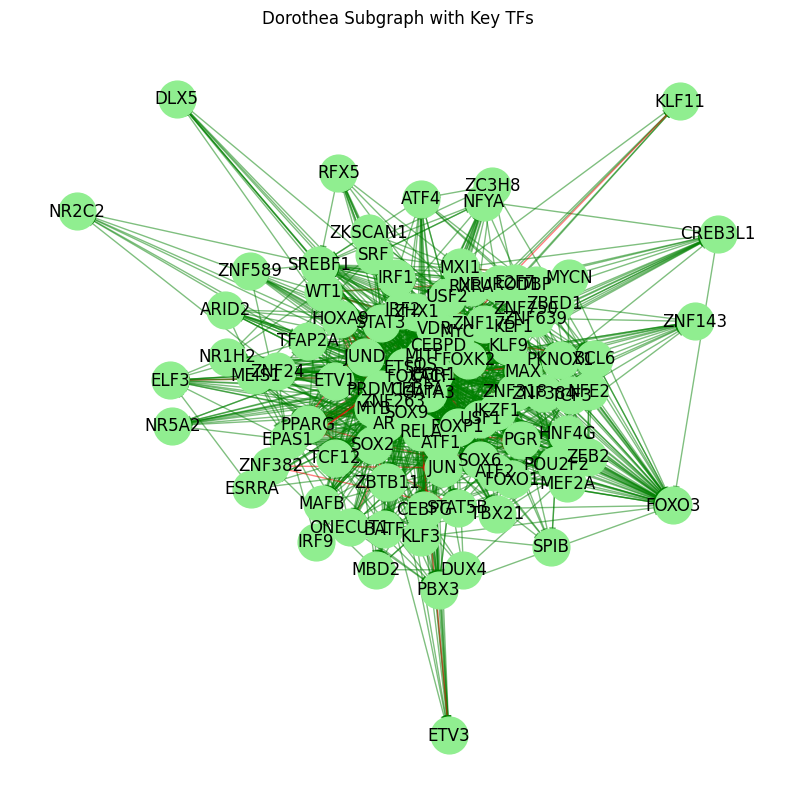

Number of nodes in reduced graph: 100
Number of edges in reduced graph: 1466


In [14]:
#visualize the reduced graph
plot_dorothea_graph(G_reduced)
# give some statistics about the reduced graph
print(f"Number of nodes in reduced graph: {G_reduced.number_of_nodes()}")
print(f"Number of edges in reduced graph: {G_reduced.number_of_edges()}")

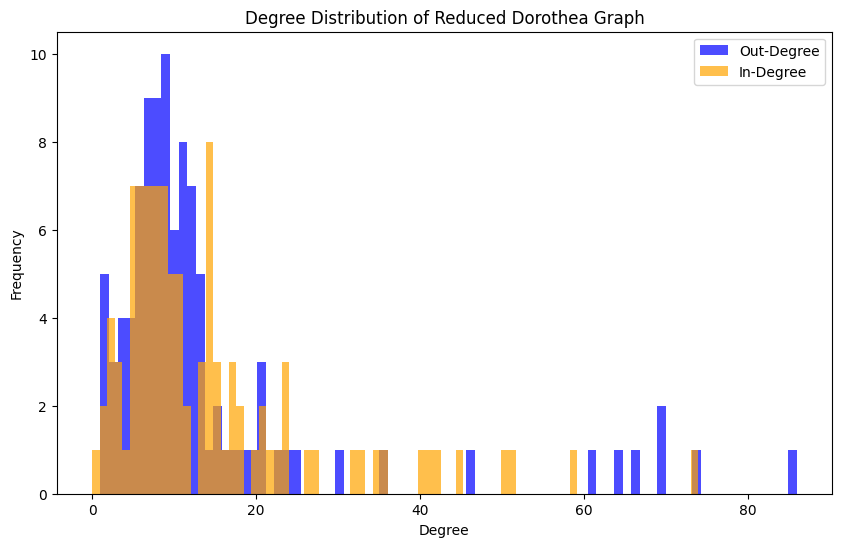

In [15]:
# create a histogram of the out-degree and in-degree distribution of the reduced graph
plt.figure(figsize=(10, 6))
out_degree_sequence = [d for n, d in G_reduced.out_degree()]
in_degree_sequence = [d for n, d in G_reduced.in_degree()]
plt.hist(out_degree_sequence, bins=80, color='blue', alpha=0.7, label='Out-Degree')
plt.hist(in_degree_sequence, bins=80, color='orange', alpha=0.7, label='In-Degree')
plt.title("Degree Distribution of Reduced Dorothea Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

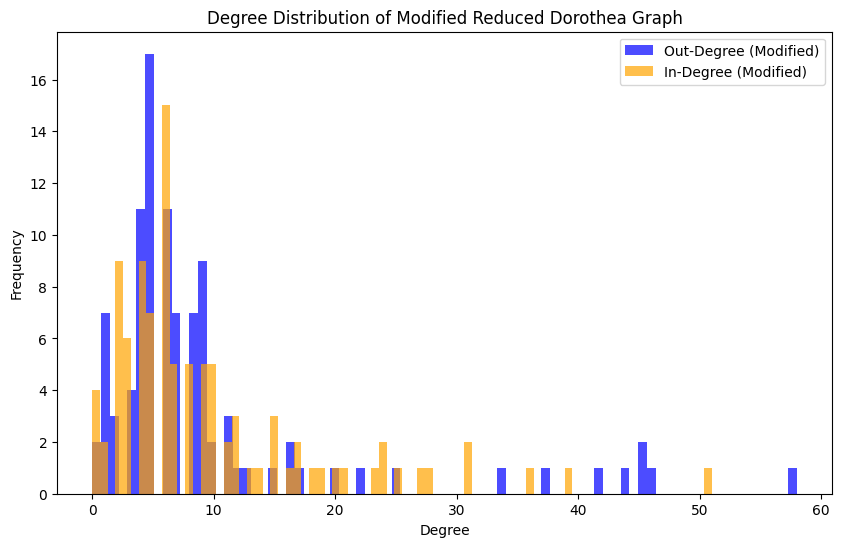

In [16]:
# copy the reduced graph, select 500 edges by random an detelete them. plot in and out degree distribution
import random
def randomly_remove_edges(G, num_edges_to_remove):
    """
    Randomly remove a specified number of edges from the graph.
    """
    if num_edges_to_remove >= G.number_of_edges():
        return G  # No edges to remove if the number is greater than or equal to existing edges
    
    edges = list(G.edges())
    edges_to_remove = random.sample(edges, num_edges_to_remove)
    
    G.remove_edges_from(edges_to_remove)
    
    return G

# Create a copy of the reduced graph
G_reduced_copy = G_reduced.copy()
# Remove 500 edges randomly
num_edges_to_remove = 500
G_reduced_copy = randomly_remove_edges(G_reduced_copy, num_edges_to_remove)

# select the largest weakly connected component from the modified graph
largest_component_copy = max(nx.weakly_connected_components(G_reduced_copy), key=len)
G_reduced_copy = G_reduced_copy.subgraph(largest_component_copy).copy()

# Plot the in-degree and out-degree distribution of the modified graph
plt.figure(figsize=(10, 6))
out_degree_sequence_copy = [d for n, d in G_reduced_copy.out_degree()]
in_degree_sequence_copy = [d for n, d in G_reduced_copy.in_degree()]
plt.hist(out_degree_sequence_copy, bins=80, color='blue', alpha=0.7, label='Out-Degree (Modified)')
plt.hist(in_degree_sequence_copy, bins=80, color='orange', alpha=0.7, label='In-Degree (Modified)')
plt.title("Degree Distribution of Modified Reduced Dorothea Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [17]:
# print n nodes n edges in the modified graph
print(f"Number of nodes in modified reduced graph: {G_reduced_copy.number_of_nodes()}")
print(f"Number of edges in modified reduced graph: {G_reduced_copy.number_of_edges()}")

Number of nodes in modified reduced graph: 100
Number of edges in modified reduced graph: 966


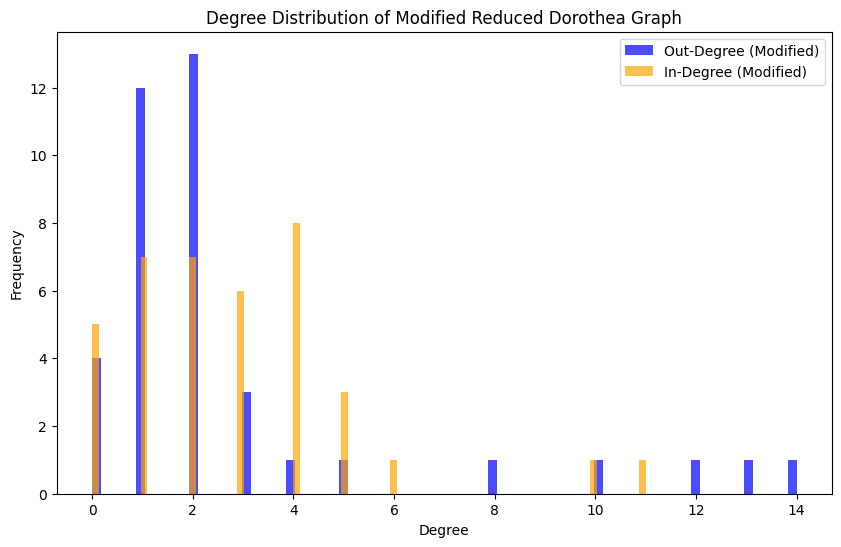

Number of nodes in modified reduced graph: 39
Number of edges in modified reduced graph: 113
Number of nodes without outgoing edges in reduced graph: 4
Number of weakly connected components in modified reduced graph: 1


In [40]:

# Remove 500 edges randomly
num_edges_to_remove = 1
G_reduced_copy_2 = randomly_remove_edges(G_reduced_copy_2, num_edges_to_remove)

# select the largest weakly connected component from the modified graph
largest_component_copy = max(nx.weakly_connected_components(G_reduced_copy_2), key=len)
G_reduced_copy_2 = G_reduced_copy_2.subgraph(largest_component_copy).copy()

# Plot the in-degree and out-degree distribution of the modified graph
plt.figure(figsize=(10, 6))
out_degree_sequence_copy = [d for n, d in G_reduced_copy_2.out_degree()]
in_degree_sequence_copy = [d for n, d in G_reduced_copy_2.in_degree()]
plt.hist(out_degree_sequence_copy, bins=80, color='blue', alpha=0.7, label='Out-Degree (Modified)')
plt.hist(in_degree_sequence_copy, bins=80, color='orange', alpha=0.7, label='In-Degree (Modified)')
plt.title("Degree Distribution of Modified Reduced Dorothea Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# print n nodes, n edges in the modified graph
print(f"Number of nodes in modified reduced graph: {G_reduced_copy_2.number_of_nodes()}")
print(f"Number of edges in modified reduced graph: {G_reduced_copy_2.number_of_edges()}")
# print number of nodes without outgoing edges in the reduced graph
num_nodes_without_outgoing_edges = sum(1 for n in G_reduced_copy_2.nodes() if G_reduced_copy_2.out_degree(n) == 0)
print(f"Number of nodes without outgoing edges in reduced graph: {num_nodes_without_outgoing_edges}")
# check number of weakly connected components in the modified graph
num_components_copy = nx.number_weakly_connected_components(G_reduced_copy_2)
print(f"Number of weakly connected components in modified reduced graph: {num_components_copy}")

In [41]:
create_topo_file_from_graph("dorothea_39", G_reduced_copy_2, Path("../topos/"))

In [39]:
G_reduced_copy_2 = reduce_graph_to_n_nodes(G_reduced_copy_2, 40)

In [19]:
# print n nodes, n edges in the modified graph
print(f"Number of nodes in modified reduced graph: {G_reduced_copy_2.number_of_nodes()}")
print(f"Number of edges in modified reduced graph: {G_reduced_copy_2.number_of_edges()}")
# print number of nodes without outgoing edges in the reduced graph
num_nodes_without_outgoing_edges = sum(1 for n in G_reduced_copy_2.nodes() if G_reduced_copy_2.out_degree(n) == 0)
print(f"Number of nodes without outgoing edges in reduced graph: {num_nodes_without_outgoing_edges}")
# check number of weakly connected components in the modified graph
num_components_copy = nx.number_weakly_connected_components(G_reduced_copy_2)
print(f"Number of weakly connected components in modified reduced graph: {num_components_copy}")

Number of nodes in modified reduced graph: 99
Number of edges in modified reduced graph: 866
Number of nodes without outgoing edges in reduced graph: 1
Number of weakly connected components in modified reduced graph: 1


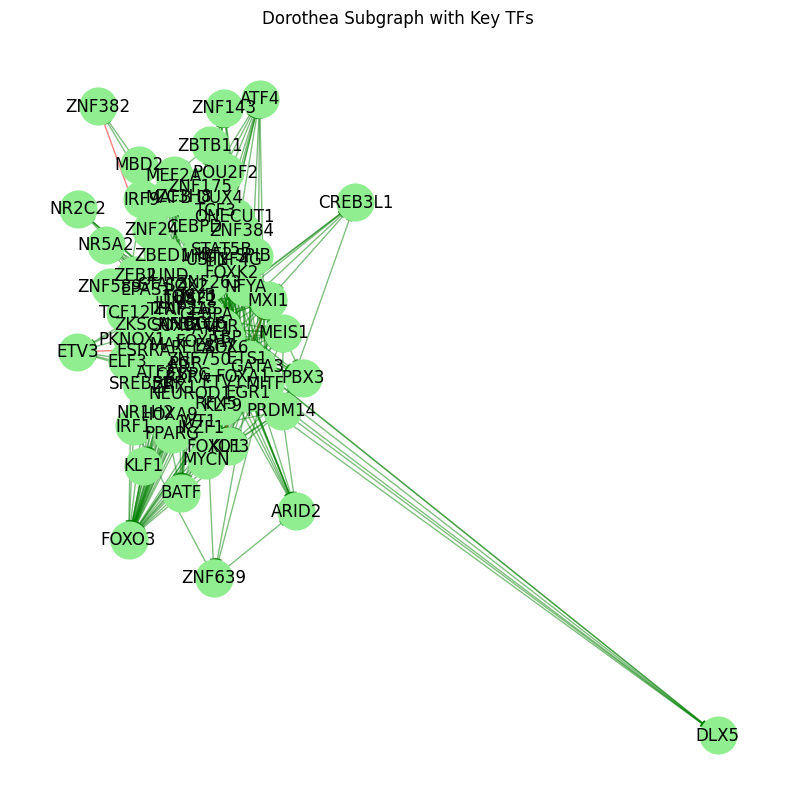

In [20]:
# plot the modified graph
plot_dorothea_graph(G_reduced_copy_2)

In [21]:
# print amount of nodes without outgoing edges in the reduced graph
num_nodes_without_outgoing_edges = sum(1 for n in G_reduced.nodes() if G_reduced.out_degree(n) == 0)
print(f"Number of nodes without outgoing edges in reduced graph: {num_nodes_without_outgoing_edges}")


Number of nodes without outgoing edges in reduced graph: 0


In [22]:
# store the reduced graph as a topo file
create_topo_file_from_graph("dorothea_100", G_reduced_copy_2, Path("../topos/"))

In [23]:
reduced_75 = reduce_graph_to_n_nodes(G_reduced_copy_2, 75)
# store the reduced graph with 75 nodes as a topo file
create_topo_file_from_graph("dorothea_75", reduced_75, Path("../topos/"))

In [24]:
reduced_50 = reduce_graph_to_n_nodes(reduced_75, 50)
# store the reduced graph with 50 nodes as a topo file
create_topo_file_from_graph("dorothea_50", reduced_50, Path("../topos/"))

In [25]:
# starting at node TP53, create a subgraph with 150 nodes that is biologically relevant
def create_biologically_relevant_subgraph(G, start_node, num_nodes):
    """
    Create a subgraph starting from a given node and expanding to include a specified number of nodes.
    :param G: nx Graph
    :param start_node: Node to start the subgraph from
    :param num_nodes: Number of nodes to include in the subgraph
    :return: Subgraph with the specified number of nodes
    """
    if not G.has_node(start_node):
        raise ValueError(f"Start node {start_node} is not in the graph.")
    
    # Perform a breadth-first search to find the subgraph
    sub_nodes = set()
    queue = [start_node]
    
    while queue and len(sub_nodes) < num_nodes:
        current_node = queue.pop(0)
        if current_node not in sub_nodes:
            sub_nodes.add(current_node)
            neighbors = list(G.neighbors(current_node))
            for neighbor in neighbors:
                if neighbor not in sub_nodes:
                    queue.append(neighbor)
    
    return G.subgraph(sub_nodes).copy()

In [26]:
MTOR_nodes = ["IGF1R","INSR","IRS1","PIK3CA","PIK3CB","PIK3CD","PIK3R1","PIK3R2","PIK3R3","RAF1","BRAF","MAPK1","MAPK3","HRAS","KRAS","NRAS","MAP2K1",
              "MAP2K2","PTEN","PDPK1","AKT3","AKT1","AKT2","TSC1","TSC2","RHEB","EIF4EBP1","LPIN1","LPIN2","RPS6KB1","RPS6KB2","RHOA","PRKCA","PRKCB",
              "PRKCG","SGK1","RRAGB","RRAGA","RRAGD","RRAGC","RPS6KA6","RPS6KA1","RPS6KA2","RPS6KA3","PRKAA1","PRKAA2","GRB2","DDIT4","EIF4E","EIF4E2",
              "ULK1","ULK2","RPS6","TNF","IKBKB","TNFRSF1A","SLC7A5","SLC3A2","SOS1","SOS2","NPRL2","NPRL3","DEPDC5","SKP2","MIOS","SEC13","WDR59",
              "SEH1L","ATP6V1D","ATP6V1H","ATP6V1A","ATP6V1B1","ATP6V1B2","ATP6V1C1","ATP6V1E1","ATP6V1F","ATP6V1G1","LAMTOR5","LAMTOR2","LAMTOR3",
              "CHUK","IGF1","INS","GRB10","FLCN","EIF4B","MTOR","DEPTOR","MLST8","TTI1","TELO2","PRR5","PRR5L","MAPKAP1","GSK3B","WNT16","WNT4","WNT1",
              "WNT2","WNT3","WNT5A","WNT6","WNT7A","WNT8B","WNT10B","WNT11","WNT2B","WNT5B","FZD10",
              "FZD2","FZD5","FZD3","FZD1","FZD4","FZD6","FZD7","FZD8","FZD9","LRP6","LRP5","DVL1","DVL2","DVL3","CLIP1","STK11","STRADA","CAB39","CAB39L"]
MAPK_nodes = ["RASGRF1","DUSP10","DUSP1","DUSP2","DUSP4","DUSP5","DUSP6","DUSP7","DUSP8","DUSP9","DUSP3","PTPN7","PTPRR","PPM1B","FASLG","MAP4K4",
              "PLA2G4A","PLA2G4C","STMN1","MAPT","NFKB1","NFKB2","RELA","RELB","CHUK","IKBKB","IKBKG","MAPK1","MAPK3","LAMTOR3","MAP2K2","MAP2K1",
              "RAF1","BRAF","RASA1","NF1","PRKCA","PRKCB","PRKCG","RAP1A","RAP1B","PRKACA","PRKACB","PRKACG","RAPGEF2","RASA2","RRAS2","MRAS","HRAS",
              "KRAS","NRAS","RRAS","RASGRP1","RASGRP2","RASGRP3","SOS1","SOS2","GNA12","GNG12","GRB2","CSF1R","EGFR","EPHA2","ERBB2","ERBB3","ERBB4",
              "FGFR1","FGFR3","FGFR2","FGFR4","FLT1","FLT3","FLT4","IGF1R","INSR","KDR","KIT","MET","NGFR","NTRK1","NTRK2","PDGFRA","PDGFRB","RET",
              "TEK","CACNG3","CACNG2","CACNG5","CACNG4","CACNA2D3","CACNA1A","CACNA1B","CACNA1C","CACNA1D","CACNA1E","CACNA1F","CACNA1S","CACNA2D1",
              "CACNB1","CACNB2","CACNB3","CACNB4","CACNG1","CACNA1I","CACNA1H","CACNA1G","CACNA2D2","NR4A1","MAPK7","MAP2K5","NLK","CDC25B","RPS6KA4",
              "RPS6KA5","MAPKAPK3","MAPKAPK2","ATF4","MEF2C","MAX","DDIT3","ELK4","TP53","ELK1","ATF2","MAPK14","MAPK11","MAPK13","PPP5C","MAP2K6",
              "MAP2K3","PPM1A","AKT3","AKT1","AKT2","TAOK3","TAOK1","TAOK2","MAP3K4","HSPB1","MAP3K7","MAP3K5","MAP3K6","MAP3K20","MAP3K12","MAP3K13",
              "MAP3K9","MAP3K10","MAP4K2","STK3","STK4","ECSIT","TAB2","TAB1","GADD45G","GADD45A","GADD45B","TRAF6","DAXX","TRAF2","CASP3","CD14",
              "TGFBR1","TGFBR2","FAS","IL1R1","IL1RAP","TNFRSF1A","TGFB1","TGFB2","TGFB3","IL1A","IL1B","TNF","MAPKAPK5","RAC1","RAC2","RAC3","CDC42",
              "PAK1","PAK2","MAP3K2","MAP3K3","MAPK8IP2","MAPK8IP1","MAP3K11","MAP2K7","MAPK8","MAPK9","MAPK10","MAP2K4","CRK","CRKL","ARRB1","ARRB2",
              "MECOM","HSPA1A","HSPA1L","HSPA6","HSPA8","JUND","FOS","JUN","NFATC3","NFATC1","PPP3CA","PPP3CB","PPP3CC","PPP3R1","MAPK8IP3","FLNA",
              "MAP3K1","MAP3K8","MAP4K1","MAP4K3","SRF","MYC","RPS6KA6","RPS6KA1","RPS6KA2","RPS6KA3","MKNK2","MKNK1","CSF1","EFNA1","EFNA2","EFNA3",
              "EFNA4","EFNA5","EGF","EREG","FGF1","FGF2","FGF3","FGF4","FGF5","FGF6","FGF7","FGF8","FGF9","VEGFD","FLT3LG","FGF20","FGF21","GDNF",
              "FGF22","ANGPT1","ANGPT2","HGF","IGF1","INS","AREG","KITLG","NGF","NRTN","NTF3","ANGPT4","PDGFA","PDGFB","PGF","PDGFC","PSPN","BDNF",
              "TGFA","VEGFA","VEGFB","VEGFC","PDGFD","FGF23","FGF18","FGF17","ARTN","TRADD","MYD88","IRAK1","IRAK4","ARAF",]
TP53_nodes = ["SIAH1","IGFBP3","GADD45G","GADD45A","GADD45B","MDM4","CHEK1","ATR","CHEK2","ATM","RPRM","SFN","CDK2","CCNE1","CCNE2","TSC2","PPM1D",
              "TP73","CCNG1","CCNG2","RRM2","DDB2","STEAP3","PTEN","SERPINB5","CD82","THBS1","IGF1","SERPINE1","ADGRB1","CDKN2A","CDKN1A","ZMAT3",
              "BID","EI24","TP53I3","FAS","GTSE1","BAX","PIDD1","TNFRSF10B","CASP8","CDK1","APAF1","CYCS","CASP9","MDM2","TP53","RCHY1","CDK4","CDK6",
              "CCND1","CCND2","CCND3","PERP","SESN1","CCNB1","CCNB2","CASP3","TP53AIP1","BBC3","PMAIP1","SIVA1","BCL2L1","BCL2","PPP1R13L",]

Subgraph with MAPK nodes: 224 nodes, 632 edges
Number of weakly connected components in MAPK subgraph: 1


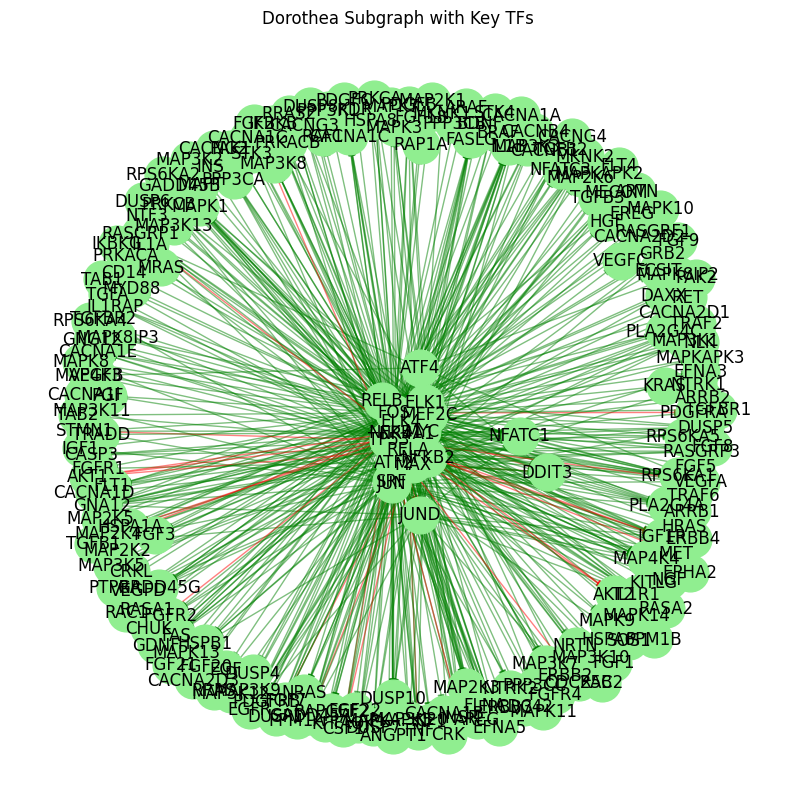

In [27]:
# Create a subgraph with the MTOR nodes
G_sub = G_filtered.subgraph(MAPK_nodes).copy()  
# drop isolated nodes
G_sub.remove_nodes_from(list(nx.isolates(G_sub)))
print(f"Subgraph with MAPK nodes: {G_sub.number_of_nodes()} nodes, {G_sub.number_of_edges()} edges")
# print number and size of weakly connected components
num_components = nx.number_weakly_connected_components(G_sub)
print(f"Number of weakly connected components in MAPK subgraph: {num_components}")  

# plot the subgraph
plot_dorothea_graph(G_sub)

In [28]:


# Step 1: pick key TFs
seed_tfs = ['MTOR']  # good hubs
# seed_tfs = ['TP53']  # good hubs
N_NODES = 150  # maximum number of nodes in the subgraph

# Step 2: find their targets
nodes = set(seed_tfs)
for tf in seed_tfs:
    nodes.update(G.successors(tf))  # first-degree targets

# Optional: add second layer to enrich cycles
for node in list(nodes):
    nodes.update(G.successors(node))

# Step 3: Create the subgraph
G_sub = G.subgraph(nodes).copy()

# Optionally reduce to top 50 nodes by degree
if len(G_sub) > N_NODES:
    top_nodes = sorted(G_sub.degree, key=lambda x: -x[1])[:N_NODES]
    G_sub = G_sub.subgraph([n for n, _ in top_nodes]).copy()

# Print info
print(f"Subgraph: {G_sub.number_of_nodes()} nodes, {G_sub.number_of_edges()} edges")



Subgraph: 1 nodes, 0 edges


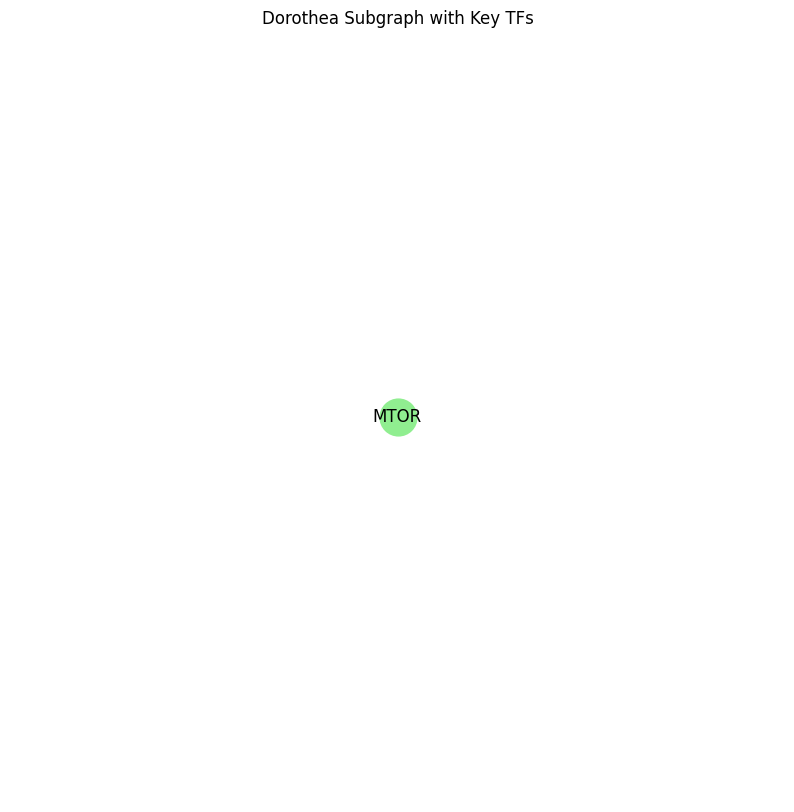

In [29]:
plot_dorothea_graph(G_sub)

In [30]:
# Create topo file
create_topo_file_from_graph("dorothea_tp53_myc", G_filtered, "../../data/topos")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/topos/dorothea_tp53_myc.topo'